# Misura del campo magnetico terrestre alle varie latitudini

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import pandas as pd 
import numpy as np

Come prima cosa andiamo ad analizzare cosa intendiamo per latitudine e longitudine

Latitudine
<img src="images/lines-of-latitude.jpg"/>

Longitudine
<img src="images/lines-of-longitude.jpg"/>

In [5]:
data = pd.read_csv('test.csv')
lat, lon = data['latitudine'], data['longitudine']

angolo_sole = data['angolo_sole']
print(np.min(angolo_sole),np.max(angolo_sole))


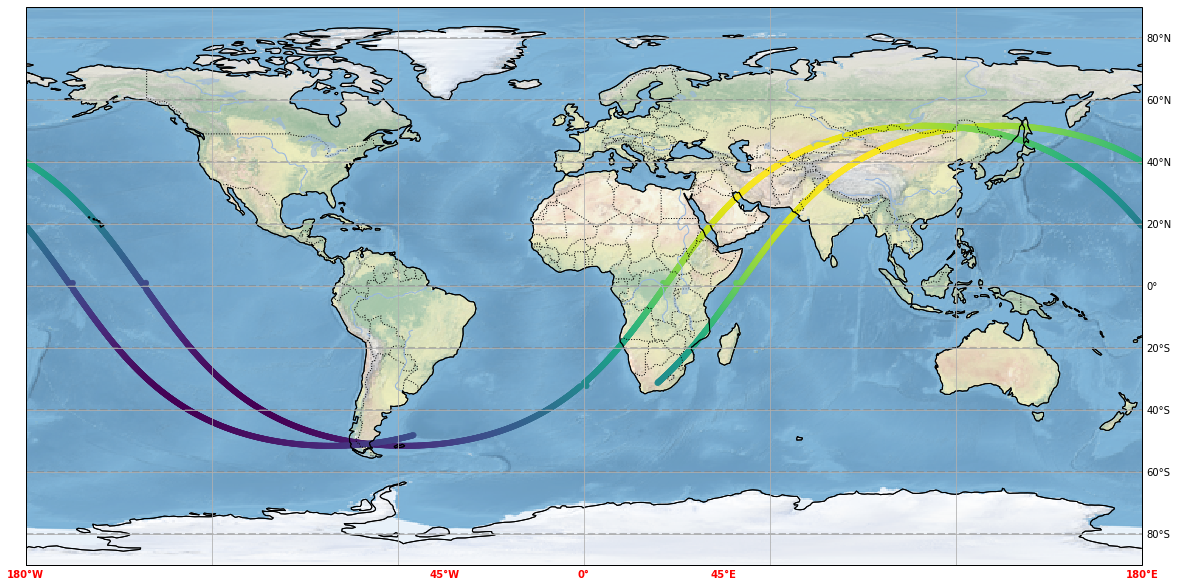

In [16]:
%matplotlib inline
fig = plt.figure(figsize=(20, 16)) 
ax = plt.axes(projection=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.coastlines()
ax.set_global()
ax.gridlines()
ax.stock_img()
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')

plt.scatter(lon, lat, transform=ccrs.PlateCarree(), label=None, linewidth=0, alpha=0.5,c=angolo_sole, cmap='viridis')

calcolo il modulo del vettore del campo magnetico

In [12]:
module = np.sqrt(data['mag_x'] ** 2 + data['mag_y'] ** 2 + data['mag_z']**2)

-54.391091304372644 54.47867482009973


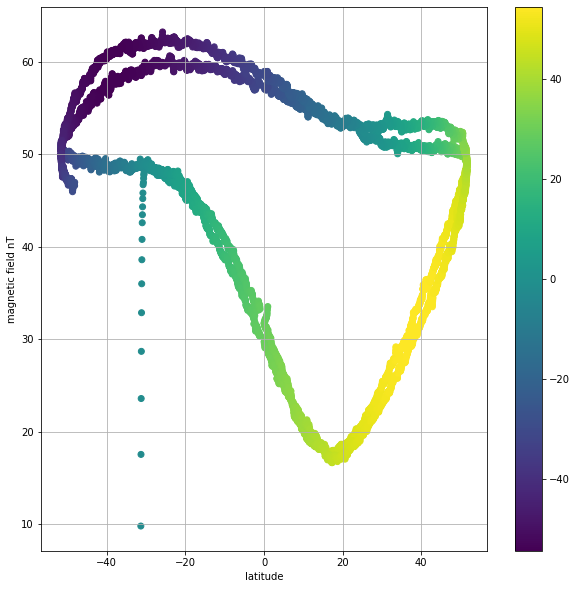

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
plt.ylabel('magnetic field nT')
plt.xlabel('latitude')
plt.scatter(lat,module,c=angolo_sole, cmap='viridis')
plt.colorbar()

-54.391091304372644 54.47867482009973


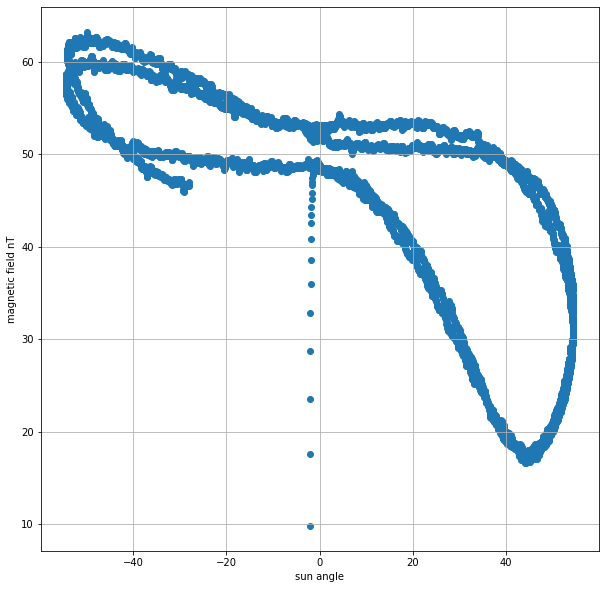

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.grid()
plt.xlabel('sun angle')
plt.ylabel('magnetic field nT')
plt.scatter(angolo_sole, module)